# Лабораторная работа 2
## Линейная нейронная сеть. Правило обучения Уидроу-Хоффа
Вариант 3 

Сутдент: Будникова Валерия Павловна 

группа: М8О-407Б-19  

### Цель работы: 
Bсследование свойств линейной нейронной сети и алгоритмов ее обучения, применение сети в задачах аппроксимации и фильтрации.

### Задание:
1. Использовать линейную нейронную сеть с задержками для аппроксимации функции. В качестве метода обучения использовать адаптацию.
2. Использовать линейную нейронную сеть с задержками для аппроксимации функции и выполнения многошагового прогноза.
3. Использовать линейную нейронную сеть в качестве адаптивного фильтра для подавления помех. Для настройки весовых коэффициентов использовать метод наименьших квадратов.

### Реализация:

In [108]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import math
from math import pi as PI

In [109]:
input_f1 = lambda t: math.sin(-3 * t**2 + 7*t)
input_f2 = lambda t: math.sin(2.5 * t**2 - 5*t)
output_f = lambda t: 1/3 * (math.sin(2.5 * t**2 - 5 * t + 4 * PI))

t1 = np.arange(0, 5, 0.025).tolist()
t2 = np.arange(0, 2.2, 0.001).tolist()



In [110]:
from cProfile import label
import seaborn as sns

def Split_data(x, y, D):
    x_data_train = []
    for i in range(len(x) - D):
        data = [x[j] for j in range(i, i + D)]
        x_data_train.append(data)
    x_label = y[D:]
    return x_data_train, x_label

def Plot(count, points_xy):
    rows = math.ceil(count/3)
    cols = 3 if count > 3 else count
    fig, subplots = plt.subplots(nrows=rows, ncols = cols)
    
    fig.set_figwidth(8 * cols)
    fig.set_figheight(4 * rows)

    colors = sns.color_palette("Set2", len(points_xy[0]))

    for i, ax in enumerate(fig.axes):
        if i < count:
            for j, xy in enumerate(points_xy[i][:-1]):
                try:
                    lbl = xy[2]
                except:
                    lbl = '.'
                ax.plot(xy[0], xy[1], color = colors[j], label = lbl)
                ax.legend()
            ax.set_title(points_xy[i][-1])


# 1

In [111]:
D = 5
models = []
for i in range(D):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(1, input_dim = i + 1, activation=keras.activations.linear,
                                kernel_initializer=keras.initializers.RandomNormal(stddev=0.5, mean=0.0),
                                bias_initializer=keras.initializers.Zeros(), ))

    model.compile(loss=keras.losses.mean_squared_error, optimizer = keras.optimizers.Adam(0.005), metrics=['mae'])
    models.append(model)


In [112]:
ep = 150
histories = []
x = [input_f1(t) for t in t1]

for i, model in enumerate(models):
    x_data, x_label = Split_data(x, x, i + 1)
    his = model.fit(x_data, x_label, epochs=ep, verbose=0);
    histories.append(his)

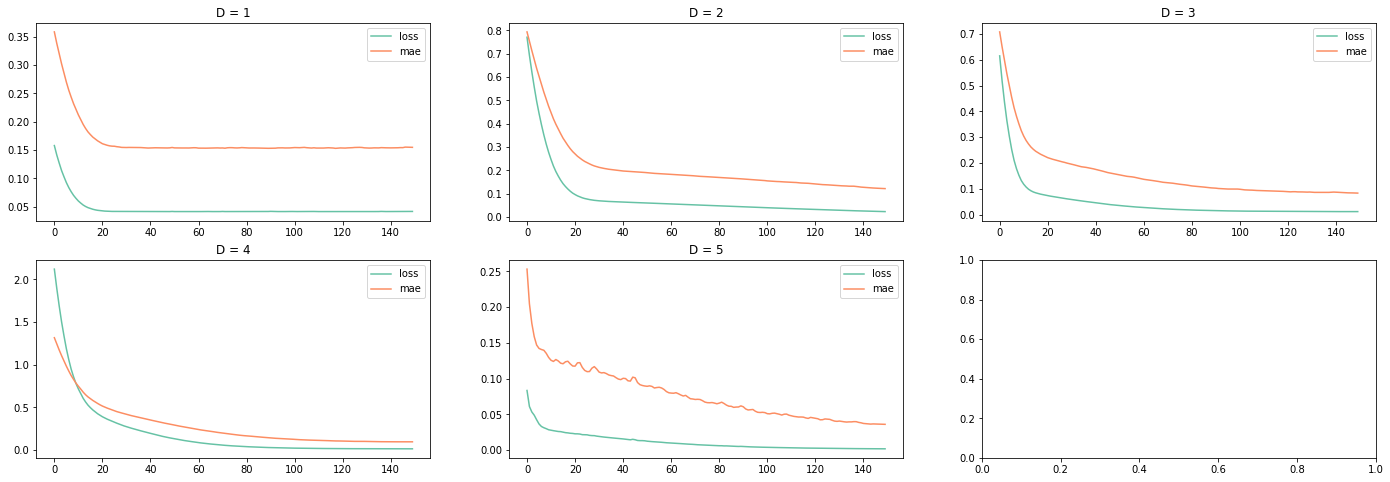

In [113]:
xy = [[[range(ep), h.history['loss'], 'loss'], [range(ep), h.history['mae'], 'mae'], 'D = ' + str(i + 1)] for i, h in enumerate(histories)]
Plot(len(xy), xy)

7/7 [==============================] - 0s 8ms/step


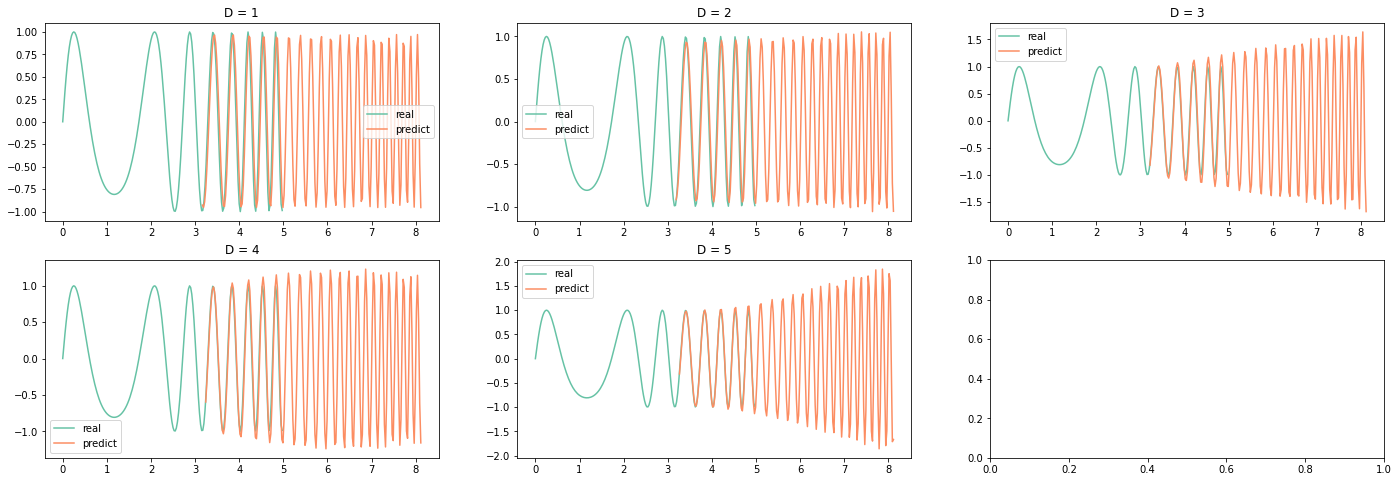

In [114]:
t1_2 = [i + PI for i in t1]
x2 = [input_f1(i) for i in t1_2]

real_and_predict_xy= []
for i, model in enumerate(models):
    x_data_test, x_l = Split_data(x2, x2, i + 1)
    xx = model.predict(x_data_test)
    
    real_and_predict_xy.append([[t1, x, 'real'], [t1_2[i + 1:], xx, 'predict'], 'D = ' + str(i + 1)])


Plot(len(real_and_predict_xy), real_and_predict_xy)


# 2

In [115]:
D = 4
models3 = []
for i in range(D):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(1, input_dim = i + 1, activation=keras.activations.linear,
                                kernel_initializer=keras.initializers.RandomNormal(stddev=0.5, mean=0.0),
                                bias_initializer=keras.initializers.Zeros(), ))

    model.compile(loss=keras.losses.mean_squared_error, optimizer = keras.optimizers.Adam(0.001), metrics=['mae'])
    models3.append(model)


In [116]:
ep3 = 100
histories3 = []
x = [input_f2(t) for t in t2]
y = [output_f(t) for t in t2]

for i, model in enumerate(models3):
    x_data, x_label = Split_data(x, y, i + 1)
    his = model.fit(x_data, x_label, epochs=ep3, verbose=0);
    histories3.append(his)

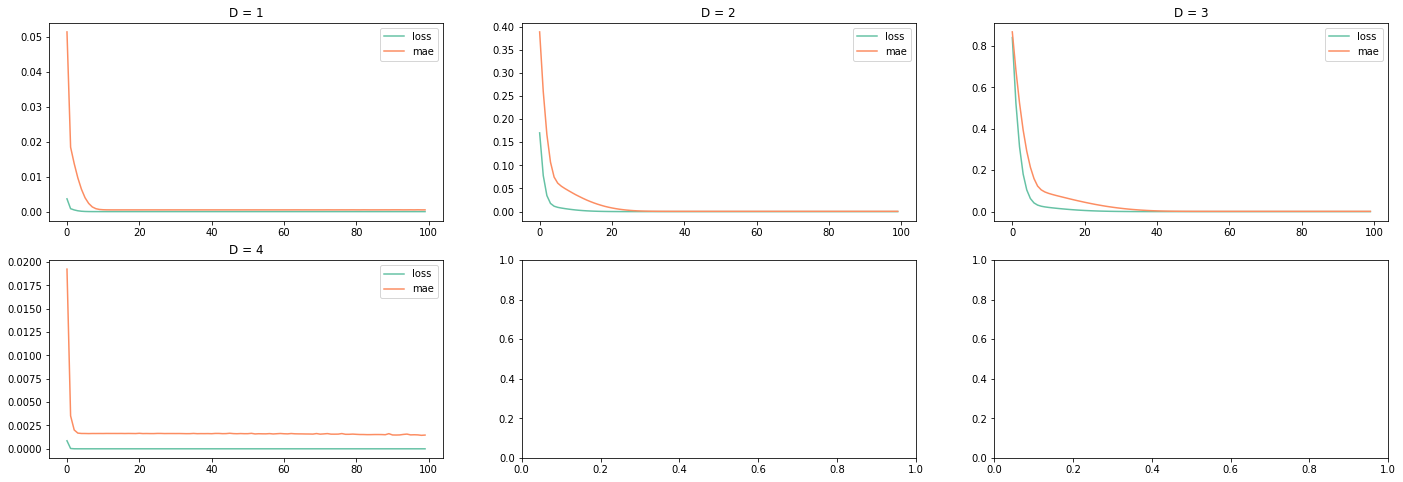

In [117]:
xy = [[[range(ep3), h.history['loss'], 'loss'], [range(ep3), h.history['mae'], 'mae'], 'D = ' + str(i + 1)] for i, h in enumerate(histories3)]
Plot(len(xy), xy)

69/69 [==============================] - 0s 2ms/step


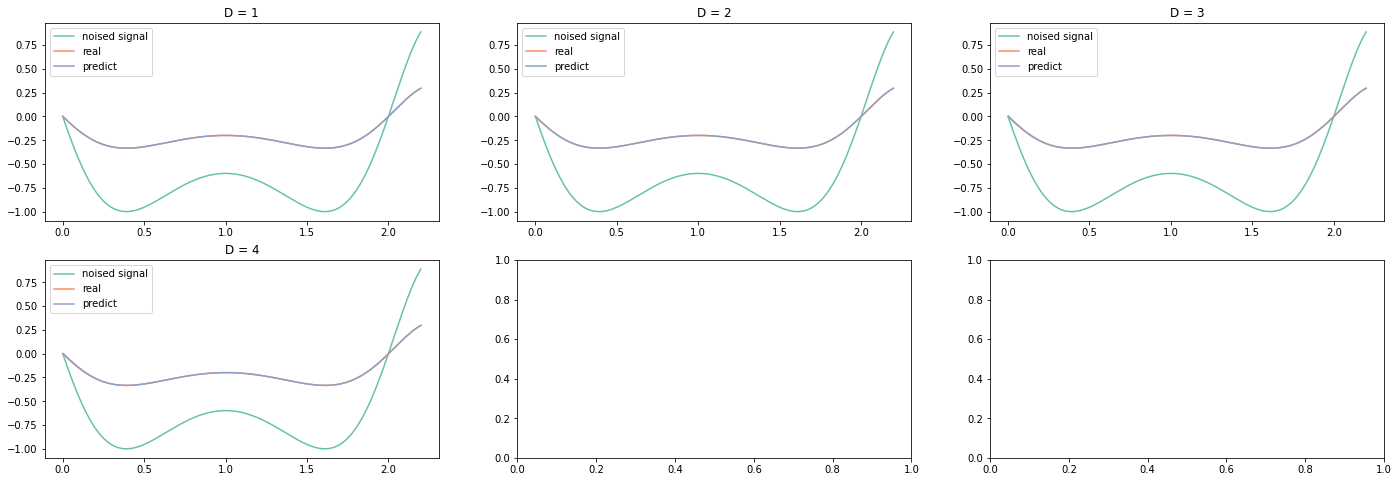

In [118]:
real_and_predict_xy= []

for i, model in enumerate(models3):
    x_data_test, x_l = Split_data(x, y, i + 1)
    yy = model.predict(x_data_test)
    
    real_and_predict_xy.append([[t2, x, 'noised signal'], [t2, y, 'real'], [t2[i + 1:], yy, 'predict'], 'D = ' + str(i + 1)])


Plot(len(real_and_predict_xy), real_and_predict_xy)

### Вывод:
В ходе данной лабораторной работы я реализовала сеть, которая предстазывает значения функции по ее предыдущим значениям с разными задержками. Также была реализована сеть для подавления помех функции. Представлены графики поведения ошибок и метрик.